# Transition dipole matrix elements

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../src/")

import absorption
import read_files

In [2]:
run = "100ps_10fs"
LHII_data = read_files.all_LHII_data(run)

Finished 'probabilities' in 79.672306 secs


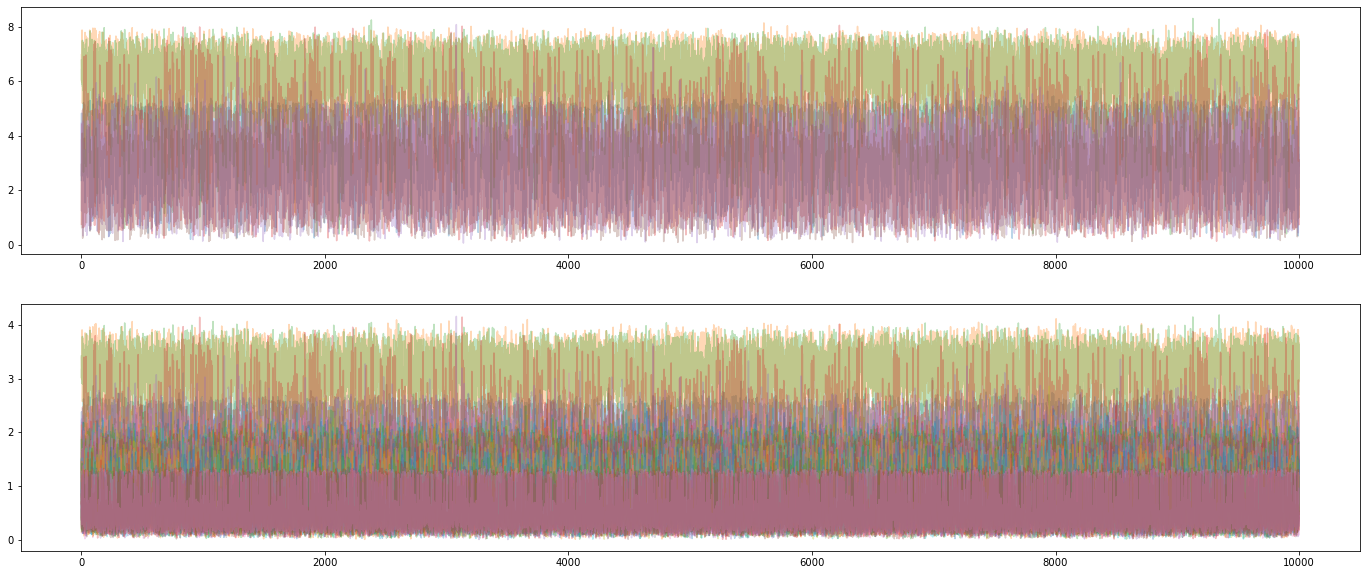

In [3]:
lights, spheres = absorption.probabilities(LHII_data["eigvec"][:10000], LHII_data["dipoles"][:10000])

lights[:, 0].shape

fig, ax = plt.subplots(2, 1, figsize=(24, 10))
ax[0].plot(spheres[:, 0:6], alpha=0.3);
ax[1].plot(lights, alpha=0.3);

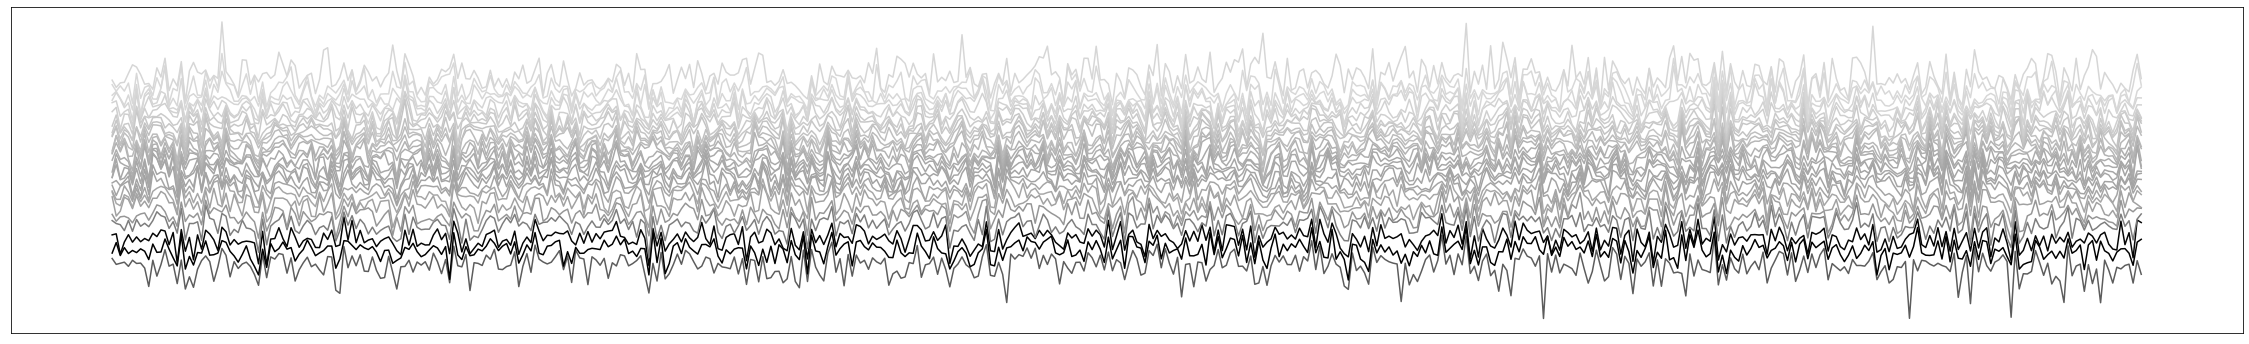

In [4]:
fig, ax = plt.subplots(figsize=(40, 6))

average_sphere = np.array([np.mean(spheres[:, i]) for i in range(27)])

for i in range(1, 28):
    ax.plot((LHII_data["eigval"][:, i] - LHII_data["eigval"][:, 0])[:500], color=f"{1- average_sphere[i-1]/np.max(average_sphere)}")

ax.set_xticks([]);
ax.set_yticks([]);

In [5]:
average_sphere = np.array([np.mean(spheres[:, i]) for i in range(27)])
average_light = np.array([np.mean(lights[:, i]) for i in range(27)])

sphere_std = np.array([np.std(spheres[:, i]) for i in range(27)])
light_std = np.array([np.std(lights[:, i]) for i in range(27)])

average_val = np.array([np.mean(LHII_data["eigval"][:, i] - LHII_data["eigval"][:, 0])  for i in range(1, 28)])

<BarContainer object of 27 artists>

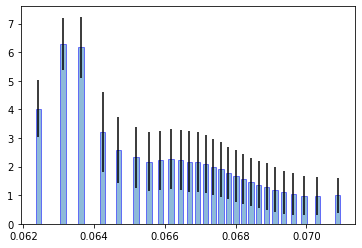

In [6]:
plt.bar(average_val, average_sphere, yerr=sphere_std, align='center', width=0.00015, alpha=0.5, edgecolor='blue')

<BarContainer object of 27 artists>

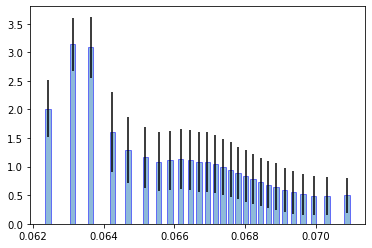

In [7]:
plt.bar(average_val, average_light, yerr=light_std, align='center', width=0.00015, alpha=0.5, edgecolor='blue')